In [2]:
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker as mtick

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


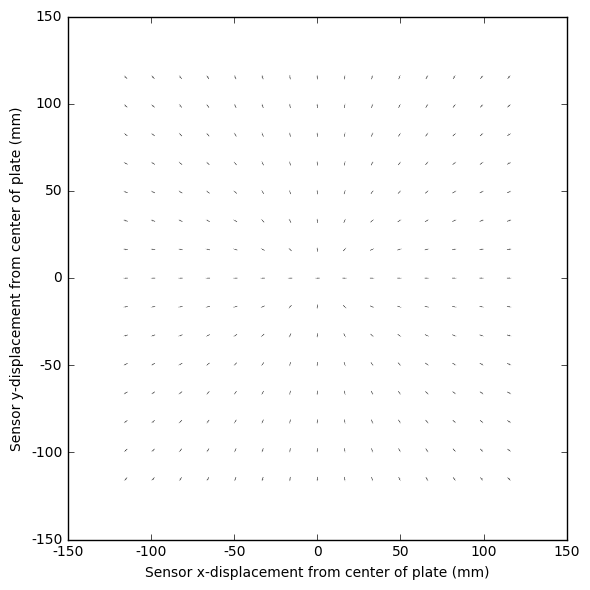

In [59]:
mm_per_grid = 16.4851752
steps_to_15 = 6000
radial_error = 2.00
total_mm = 15*mm_per_grid
x_coord = (np.dstack((np.arange(0, 15),)*15) - 7)[0]
y_coord = ((np.dstack((np.arange(0, 15),)*15) - 7).T)[:, :, 0]
angle = np.arctan2(y_coord, x_coord)
radii = np.sqrt(np.square(x_coord) + np.square(y_coord))
radial_error_x = np.ones(shape=(15,15))*np.sin(angle)*2
radial_error_y = np.ones(shape=(15,15))*np.cos(angle)*2
angular_error_x = radial_error_y/2 * radii*0.09
angular_error_y = -radial_error_x/2 * radii*0.09
angular_error_x[7, 7] = -radial_error_y[7, 7]
radial_error_y[7, 7] = 0#radial_error_x[7, 7]

quiver_scale = 1
#0.17 makes them touch 
value_scales = 0.17 * \
               0.133 # should scale them to be 0.133 the size of
                     # a grid spacing
fig, ax = plt.subplots(figsize=(6,6))

ax.quiver(value_scales*radial_error_x, value_scales*radial_error_y, 
          headaxislength=0, pivot='mid', width=0.001,
          scale=quiver_scale, scale_units='inches')
ax.quiver(value_scales*angular_error_x, value_scales*angular_error_y, 
          headaxislength=0, pivot='mid', width=0.001,
          scale=quiver_scale, scale_units='inches')

ax.set_xlabel("Sensor x-displacement from center of plate (mm)")
ax.set_ylabel("Sensor y-displacement from center of plate (mm)")

ax.xaxis.set_ticks(np.arange(-150./mm_per_grid + 7,
                             150.1/mm_per_grid + 7,
                             50/mm_per_grid))

ax.yaxis.set_ticks(np.arange(-150./mm_per_grid + 7,
                             150.1/mm_per_grid + 7,
                             50/mm_per_grid))
ax.get_xaxis().set_major_formatter(
    mtick.FuncFormatter(
    lambda x,i: '%.f' % (x*mm_per_grid-7*mm_per_grid)))
ax.get_yaxis().set_major_formatter(
    mtick.FuncFormatter(
    lambda x,i: '%.f' % (x*mm_per_grid-7*mm_per_grid)))

plt.tight_layout()
plt.savefig('positional_error_map.pdf')

In [ ]:
ax.get_ticks().set_ticks